## Create the Map for Every City

In [1]:
## load the library

from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ggplot
from ggplot import *
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from mpl_toolkits import basemap
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from itertools import chain
from lxml import etree
import matplotlib.cm as cm
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from dateutil.parser import parse
import random
import seaborn as sns
import folium
get_ipython().magic('matplotlib inline')



In [2]:
#Read the files

# STATION_DATA
station_data = pd.read_csv('data/station_data_new.csv')

# STATUS_DATA
status_data = pd.read_csv('data/status_data_new.csv')
status_data.columns = ['Index', 'station_id', 'bikes_free', 'docks_free', 'time']

# TRIP_DATA
trip_data = pd.read_csv('data/trip_data_new.csv')
trip_data.columns = ['Date', 'trip_id', 'trip_time', 'start_dt', 'start_station',
       'start_id', 'end_dt', 'end_station', 'end_id', 'bike_num', 'user_type',
       'start_city', 'end_city', 'new']

# WEATHER_DATA
weather_data = pd.read_csv('data/weather_data_new.csv')


In [14]:
#map 
latvals = [37.329732,37.804770]
lonvals = [-122.418954,-121.877349]

ERROR! Session/line number was not unique in database. History logging moved to new session 231


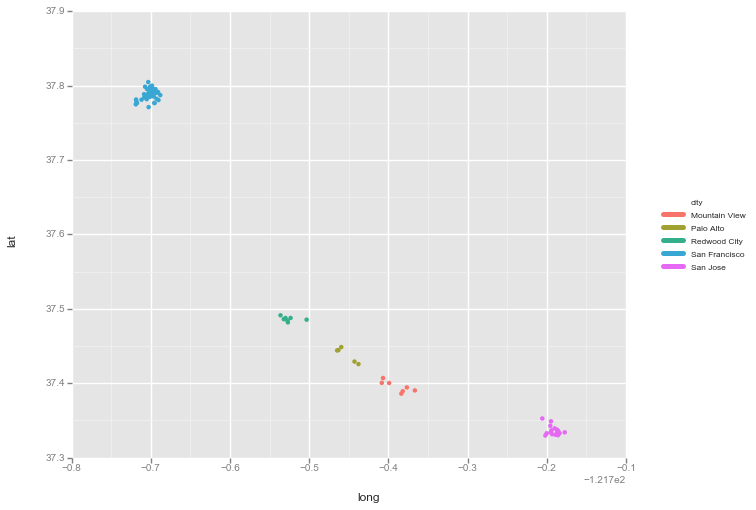

<ggplot: (-9223372036551766261)>

In [20]:
ggplot(station_data, aes(x='long',y='lat', color = 'city'))+\
    geom_point()

In [8]:
SJ= station_data[station_data['city']=="San Jose"]
SJ.index = range(16)


In [32]:
SJ.describe()
#lat 37.329732		 37.352601
#long -121.905733		 -121.877349

,station_id,lat,long,dock_count
count,16.000000,16.000000,16.000000,16.000000
mean,17.750000,37.336414,-121.891606,16.500000
std,25.409972,0.006585,0.007323,3.540245
min,2.000000,37.329732,-121.905733,11.000000
25%,5.750000,37.332373,-121.895081,15.000000
50%,9.500000,37.333972,-121.891569,15.000000
75%,13.250000,37.337868,-121.886665,19.000000
max,84.000000,37.352601,-121.877349,27.000000


In [9]:
map_1= folium.Map(location=[37.336414, -121.891606], zoom_start=13)
folium.RegularPolygonMarker(location=[SJ["lat"][0], SJ["long"][0]], 
                            popup=SJ["station_name"][0],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][1], SJ["long"][1]], 
                            popup=SJ["station_name"][1],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][2], SJ["long"][2]], 
                            popup=SJ["station_name"][2],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][3], SJ["long"][3]], 
                            popup=SJ["station_name"][3],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][4], SJ["long"][4]], 
                            popup=SJ["station_name"][4],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][5], SJ["long"][5]], 
                            popup=SJ["station_name"][5],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][6], SJ["long"][6]], 
                            popup=SJ["station_name"][6],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][7], SJ["long"][7]], 
                            popup=SJ["station_name"][7],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][8], SJ["long"][8]], 
                            popup=SJ["station_name"][8],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][9], SJ["long"][9]], 
                            popup=SJ["station_name"][9],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][10], SJ["long"][10]], 
                            popup=SJ["station_name"][10],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][11], SJ["long"][11]], 
                            popup=SJ["station_name"][11],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][12], SJ["long"][12]], 
                            popup=SJ["station_name"][12],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][13], SJ["long"][13]], 
                            popup=SJ["station_name"][13],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][14], SJ["long"][14]], 
                            popup=SJ["station_name"][14],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)
folium.RegularPolygonMarker(location=[SJ["lat"][15], SJ["long"][15]], 
                            popup=SJ["station_name"][15],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_1)


In [10]:
map_1

In [11]:
SF= station_data[station_data['city']=="San Francisco"]
SF.index = range(35)

In [51]:
SF.describe()

,station_id,lat,long,dock_count
count,35.000000,35.000000,35.000000,35.000000
mean,60.342857,37.787746,-122.401517,19.000000
std,11.527315,0.008072,0.008286,3.757346
min,39.000000,37.771058,-122.418954,15.000000
25%,50.500000,37.781542,-122.405046,15.000000
50%,61.000000,37.788446,-122.400811,19.000000
75%,69.500000,37.794185,-122.395365,21.000000
max,82.000000,37.804770,-122.388013,27.000000


In [12]:
map_2= folium.Map(location=[37.787746, -122.401517], zoom_start=14)
folium.RegularPolygonMarker(location=[SF["lat"][0], SF["long"][0]], 
                            popup=SF["station_name"][0],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][1], SF["long"][1]], 
                            popup=SF["station_name"][1],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][2], SF["long"][2]], 
                            popup=SF["station_name"][2],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][3], SF["long"][3]], 
                            popup=SF["station_name"][3],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][4], SF["long"][4]], 
                            popup=SF["station_name"][4],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][5], SF["long"][5]], 
                            popup=SF["station_name"][5],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][6], SF["long"][6]], 
                            popup=SF["station_name"][6],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][7], SF["long"][7]], 
                            popup=SF["station_name"][7],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][8], SF["long"][8]], 
                            popup=SF["station_name"][8],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][9], SF["long"][9]], 
                            popup=SF["station_name"][9],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][10], SF["long"][10]], 
                            popup=SF["station_name"][10],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][11], SF["long"][11]], 
                            popup=SF["station_name"][11],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][12], SF["long"][12]], 
                            popup=SF["station_name"][12],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][13], SF["long"][13]], 
                            popup=SF["station_name"][13],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][14], SF["long"][14]], 
                            popup=SF["station_name"][14],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][15], SF["long"][15]], 
                            popup=SF["station_name"][15],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][16], SF["long"][16]], 
                            popup=SF["station_name"][16],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][17], SF["long"][17]], 
                            popup=SF["station_name"][17],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][18], SF["long"][18]], 
                            popup=SF["station_name"][18],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][19], SF["long"][19]], 
                            popup=SF["station_name"][19],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][20], SF["long"][20]], 
                            popup=SF["station_name"][20],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][21], SF["long"][21]], 
                            popup=SF["station_name"][21],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][22], SF["long"][22]], 
                            popup=SF["station_name"][22],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][23], SF["long"][23]], 
                            popup=SF["station_name"][23],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][24], SF["long"][24]], 
                            popup=SF["station_name"][24],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][25], SF["long"][25]], 
                            popup=SF["station_name"][25],
                   fill_color='00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][26], SF["long"][26]], 
                            popup=SF["station_name"][26],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][27], SF["long"][27]], 
                            popup=SF["station_name"][27],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][28], SF["long"][28]], 
                            popup=SF["station_name"][28],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][29], SF["long"][29]], 
                            popup=SF["station_name"][29],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][30], SF["long"][30]], 
                            popup=SF["station_name"][30],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][31], SF["long"][31]], 
                            popup=SF["station_name"][31],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][32], SF["long"][32]], 
                            popup=SF["station_name"][32],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][33], SF["long"][33]], 
                            popup=SF["station_name"][33],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)
folium.RegularPolygonMarker(location=[SF["lat"][34], SF["long"][34]], 
                            popup=SF["station_name"][34],
                   fill_color='#00bfff', number_of_sides=3, radius=10).add_to(map_2)

In [13]:
map_2

In [14]:
MV= station_data[station_data['city']=="Mountain View"]
MV.index = range(7)

In [73]:
MV.describe()

,station_id,lat,long,dock_count
count,7.000000,7.000000,7.000000,7.000000
mean,30.000000,37.395348,-122.089002,16.714286
std,2.160247,0.007492,0.015940,4.535574
min,27.000000,37.385956,-122.108338,11.000000
25%,28.500000,37.389748,-122.102917,15.000000
50%,30.000000,37.394358,-122.083678,15.000000
75%,31.500000,37.400342,-122.079304,19.000000
max,33.000000,37.406940,-122.066553,23.000000


In [15]:
map_3= folium.Map(location=[37.395348, -122.089002], zoom_start=14)
folium.RegularPolygonMarker(location=[MV["lat"][0], MV["long"][0]], 
                            popup=MV["station_name"][0],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][0], radius=10).add_to(map_3)
folium.RegularPolygonMarker(location=[MV["lat"][1], MV["long"][1]], 
                            popup=MV["station_name"][1],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][1], radius=10).add_to(map_3)
folium.RegularPolygonMarker(location=[MV["lat"][2], MV["long"][2]], 
                            popup=MV["station_name"][2],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][2], radius=10).add_to(map_3)
folium.RegularPolygonMarker(location=[MV["lat"][3], MV["long"][3]], 
                            popup=MV["station_name"][3],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][3], radius=10).add_to(map_3)
folium.RegularPolygonMarker(location=[MV["lat"][4], MV["long"][4]], 
                            popup=MV["station_name"][4],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][4], radius=10).add_to(map_3)
folium.RegularPolygonMarker(location=[MV["lat"][5], MV["long"][5]], 
                            popup=MV["station_name"][5],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][5], radius=10).add_to(map_3)
folium.RegularPolygonMarker(location=[MV["lat"][6], MV["long"][6]], 
                            popup=MV["station_name"][6],
                   fill_color='#00bfff', number_of_sides=MV["dock_count"][6], radius=10).add_to(map_3)


In [16]:
map_3

In [17]:
PA= station_data[station_data['city']=="Palo Alto"]
PA.index = range(5)

In [78]:
PA.describe()

,station_id,lat,long,dock_count
count,5.000000,5.000000,5.000000,5.000000
mean,36.000000,37.438375,-122.153588,15.000000
std,1.581139,0.010262,0.012414,4.898979
min,34.000000,37.425684,-122.164759,11.000000
25%,35.000000,37.429082,-122.163093,11.000000
50%,36.000000,37.443988,-122.159504,15.000000
75%,37.000000,37.444521,-122.142805,15.000000
max,38.000000,37.448598,-122.137777,23.000000


In [18]:
map_4= folium.Map(location=[37.438375, -122.153588], zoom_start=14)
folium.RegularPolygonMarker(location=[PA["lat"][0], PA["long"][0]], 
                            popup=PA["station_name"][0],
                   fill_color='#00bfff', number_of_sides=PA["dock_count"][0], radius=10).add_to(map_4)
folium.RegularPolygonMarker(location=[PA["lat"][1], PA["long"][1]], 
                            popup=PA["station_name"][1],
                   fill_color='#00bfff', number_of_sides=PA["dock_count"][1], radius=10).add_to(map_4)
folium.RegularPolygonMarker(location=[PA["lat"][2], PA["long"][2]], 
                            popup=PA["station_name"][2],
                   fill_color='#00bfff', number_of_sides=PA["dock_count"][2], radius=10).add_to(map_4)
folium.RegularPolygonMarker(location=[PA["lat"][3], PA["long"][3]], 
                            popup=PA["station_name"][3],
                   fill_color='#00bfff', number_of_sides=PA["dock_count"][3], radius=10).add_to(map_4)
folium.RegularPolygonMarker(location=[PA["lat"][4], PA["long"][4]], 
                            popup=PA["station_name"][4],
                   fill_color='#00bfff', number_of_sides=PA["dock_count"][4], radius=10).add_to(map_4)


In [19]:
map_4

### ANALYZE WEATHER DATA

In [4]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day_of_week'] = weather_data['date'].dt.weekday_name
weather_data['number_of_week'] = weather_data['date'].dt.dayofweek
weather_data['month'] = weather_data['date'].dt.dayofweek
weather_data['year'] = weather_data['date'].dt.year


In [5]:
trip_data.columns = ['date', 'trip_id', 'trip_time', 'start_dt', 'start_station', 'start_id',
       'end_dt', 'end_station', 'end_id', 'bike_num', 'user_type',
       'start_city', 'end_city', 'new']
trip_data['date'] = pd.to_datetime(trip_data['date'])
trip_data['day_of_week'] = trip_data['date'].dt.weekday_name
trip_data['number_of_week'] = trip_data['date'].dt.dayofweek
trip_data['month'] = trip_data['date'].dt.month
trip_data['year'] = trip_data['date'].dt.year
tripdf = trip_data[trip_data['start_city'] != trip_data['end_city']]
tripsame = trip_data[trip_data['start_city'] == trip_data['end_city']]


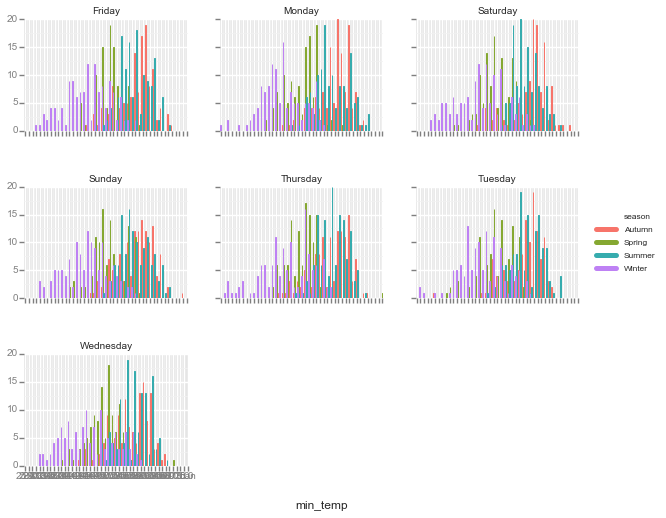

<ggplot: (-9223372036535194543)>

In [46]:
ggplot(weather_data, aes(x="min_temp", fill = "season"))+\
    geom_bar() +\
    facet_wrap("day_of_week")

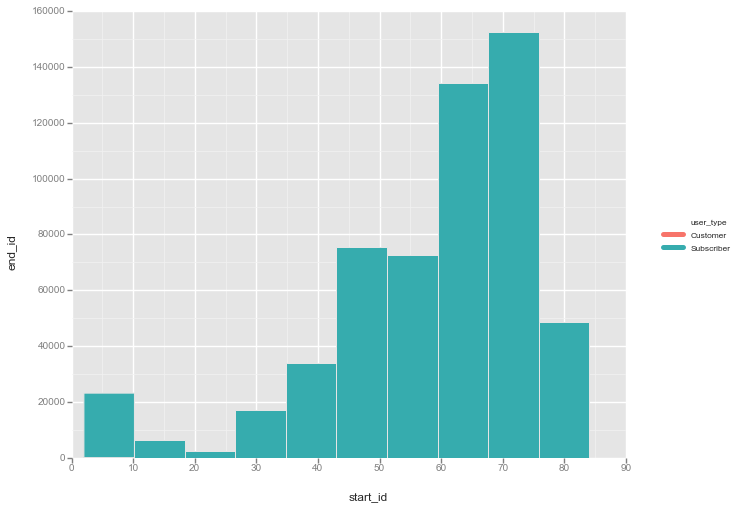

<ggplot: (383148948)>

In [123]:
ggplot(trip_data, aes(x= "start_id",y="end_id",  fill = "user_type"))+\
    geom_histogram() 

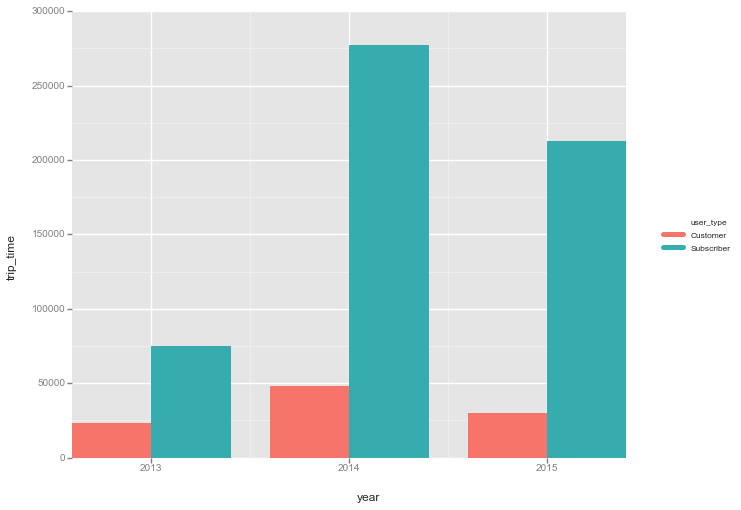

<ggplot: (-9223372036553706124)>

In [29]:
ggplot(tripsame, aes(x="year", y= "trip_time", fill = "user_type")) +\
    geom_bar()

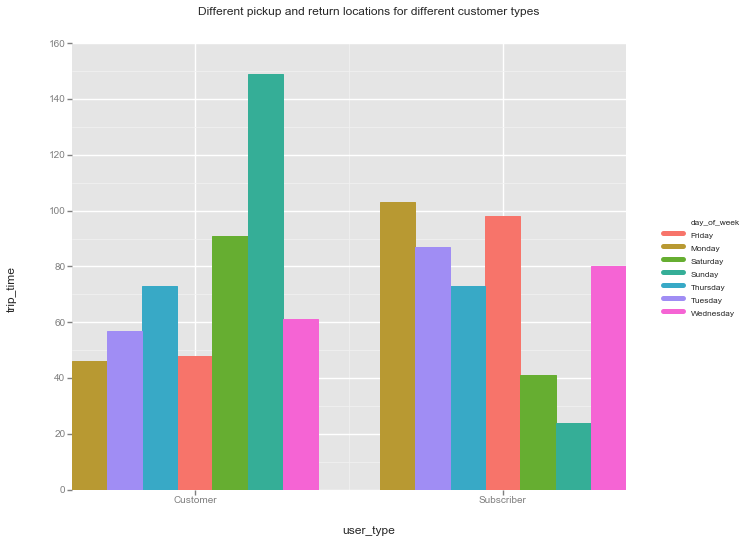

<ggplot: (301501374)>

In [7]:
ggplot(tripdf, aes(x="user_type", y="trip_time", fill="day_of_week"))+\
    geom_bar() +\
    labs(title = "Different pickup and return locations for different customer types")

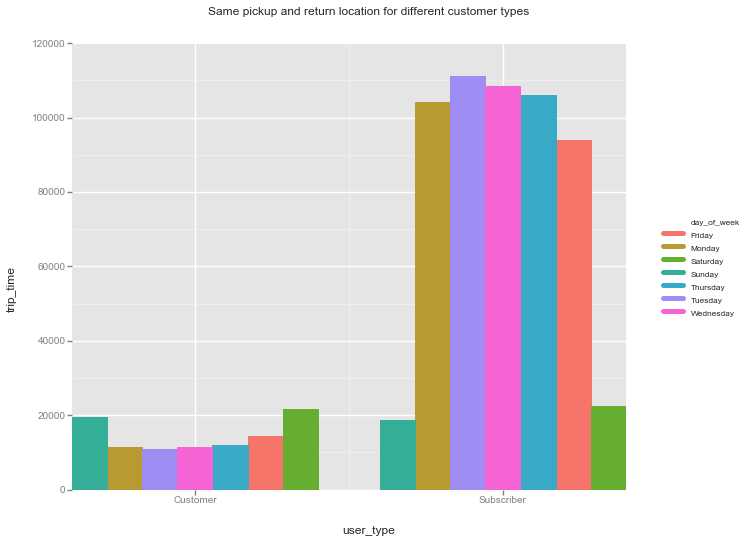

<ggplot: (301251504)>

In [8]:
ggplot(tripsame, aes(x="user_type", y="trip_time", fill="day_of_week"))+\
    geom_bar()+\
    labs(title = "Same pickup and return location for different customer types")

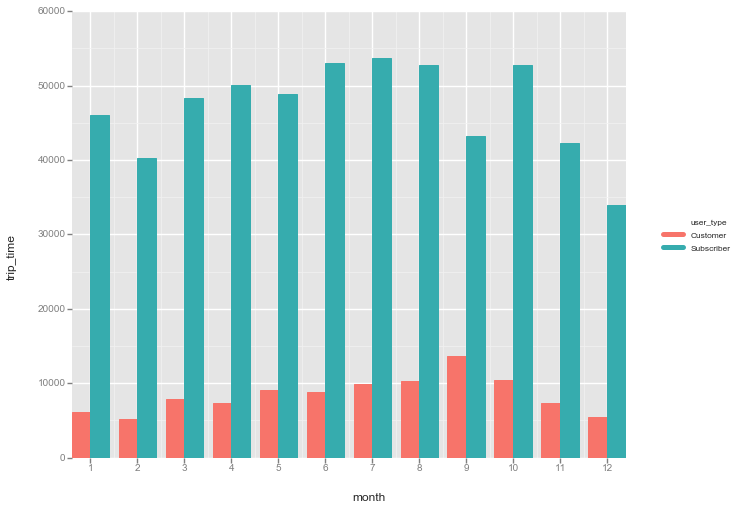

<ggplot: (301907755)>

In [13]:
ggplot(tripsame, aes(x="month", y= "trip_time", fill = "user_type")) +\
    geom_bar()

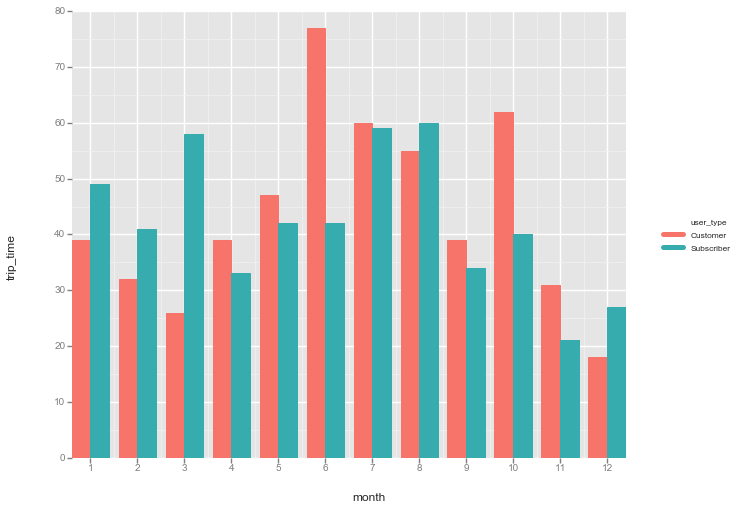

<ggplot: (301859241)>

In [12]:
ggplot(tripdf, aes(x="month", y= "trip_time", fill = "user_type")) +\
    geom_bar()

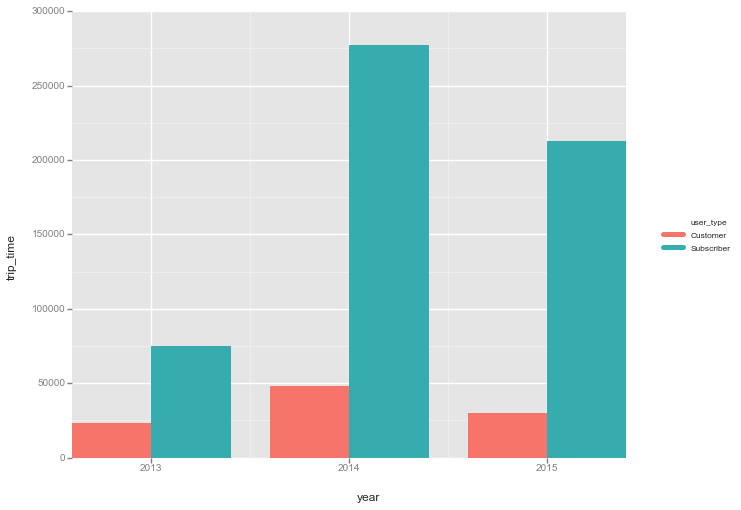

<ggplot: (-9223372036551123228)>

In [27]:
ggplot(tripsame, aes(x="year", y= "trip_time", fill = "user_type")) +\
    geom_bar()

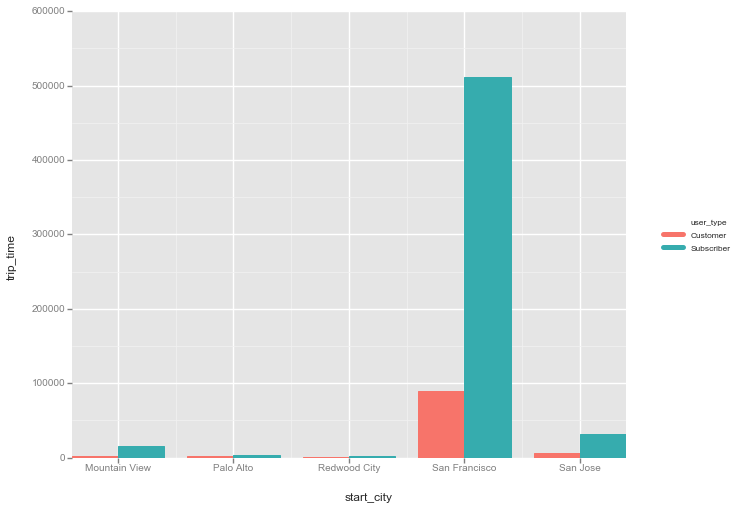

<ggplot: (-9223372036553690315)>

In [28]:
ggplot(tripsame, aes(x="start_city", y="trip_time", fill="user_type"))+\
    geom_bar()

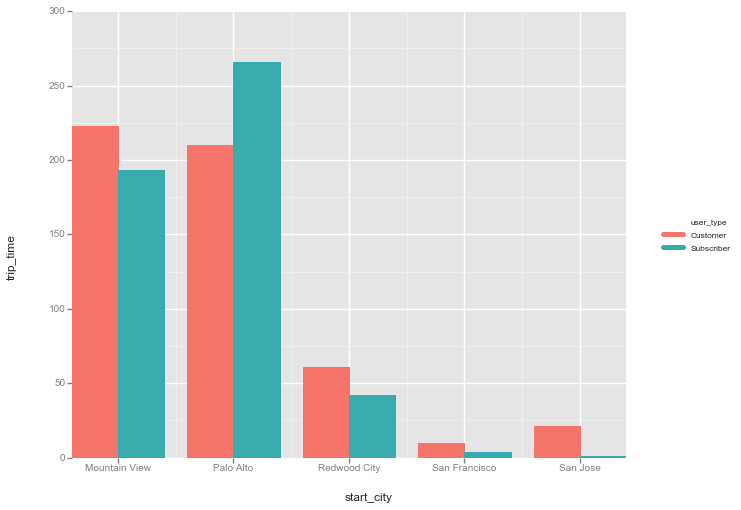

<ggplot: (-9223372036471629701)>

In [124]:
ggplot(tripdf, aes(x="start_city", y="trip_time", fill="user_type"))+\
    geom_bar()

## Merge every city trip and weather data together

In [54]:
SF_trip=tripsame[tripsame['start_city'] == 'San Francisco']
SJ_trip=tripsame[tripsame['start_city'] == 'San Jose']
MV_trip=tripsame[tripsame['start_city'] == 'Mountain View']
PA_trip=tripsame[tripsame['start_city'] == 'Palo Alto']
RW_trip=tripsame[tripsame['start_city'] == 'Redwood City']

In [59]:
SF_trip = SF_trip.drop(['end_city'], axis=1)
SF_trip = SF_trip.rename(columns={'start_city': 'city'})
SJ_trip = SJ_trip.drop(['end_city'], axis=1)
SJ_trip = SJ_trip.rename(columns={'start_city': 'city'})
MV_trip = MV_trip.drop(['end_city'], axis=1)
MV_trip = MV_trip.rename(columns={'start_city': 'city'})
PA_trip = PA_trip.drop(['end_city'], axis=1)
PA_trip = PA_trip.rename(columns={'start_city': 'city'})
RW_trip = RW_trip.drop(['end_city'], axis=1)
RW_trip = RW_trip.rename(columns={'start_city': 'city'})

In [51]:
SF_weather=weather_data[weather_data['city'] == 'San Francisco']
SJ_weather=weather_data[weather_data['city'] == 'San Jose']
MV_weather=weather_data[weather_data['city'] == 'Mountain View']
PA_weather=weather_data[weather_data['city'] == 'Palo Alto']
RW_weather=weather_data[weather_data['city'] == 'Redwood City']

In [58]:
SF_weather.groupby("season").count()

,date,max_temp,mean_temp,min_temp,max_dp,mean_dp,min_dp,max_hum,mean_hum,min_hum,...,max_gust,rain_inches,cloud_cover,wind_dir_degrees,ZIP,city,day_of_week,number_of_week,month,year
season,,,,,,,,,,,,,,,,,,,,,
Autumn,184,184,184,184,184,184,184,184,184,184,...,181,184,184,184,184,184,184,184,184,184
Spring,178,178,178,178,178,178,178,178,178,178,...,172,178,178,178,178,178,178,178,178,178
Summer,184,184,184,184,184,184,184,184,184,184,...,181,184,184,184,184,184,184,184,184,184
Winter,184,184,184,184,184,184,184,184,184,184,...,183,184,184,184,184,184,184,184,184,184


In [62]:
SF_trip_weather=SF_trip.join(SF_weather, on= "city")
SJ_trip_weather=SJ_trip.merge(SJ_weather)
MV_trip_weather=MV_trip.merge(MV_weather)
PA_trip_weather=PA_trip.merge(PA_weather)
RW_trip_weather=RW_trip.merge(RW_weather)

In [87]:
SF_trip_weather= SF_trip.merge(SF_weather, how = "left",on = ["date", "city", "month", "year", "day_of_week","number_of_week"],)
SJ_trip_weather= SJ_trip.merge(SF_weather, how = "left",on = ["date", "city", "month", "year", "day_of_week","number_of_week"],)
MV_trip_weather= MV_trip.merge(SF_weather, how = "left",on = ["date", "city", "month", "year", "day_of_week","number_of_week"],)
PA_trip_weather= PA_trip.merge(SF_weather, how = "left",on = ["date", "city", "month", "year", "day_of_week","number_of_week"],)
RW_trip_weather= RW_trip.merge(SF_weather, how = "left",on = ["date", "city", "month", "year", "day_of_week","number_of_week"],)

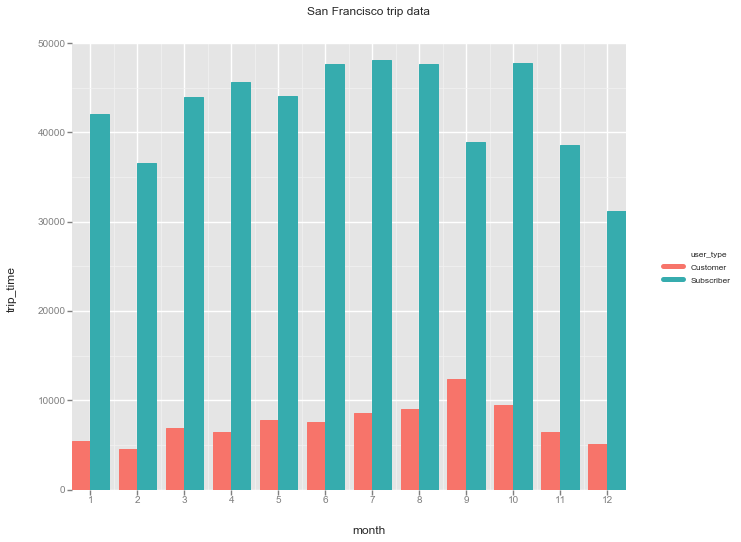

<ggplot: (387834730)>

In [126]:
ggplot(SF_trip_weather, aes(x="month", y="trip_time", fill = "user_type"))+\
    geom_bar() +\
    labs(title = "San Francisco trip data")

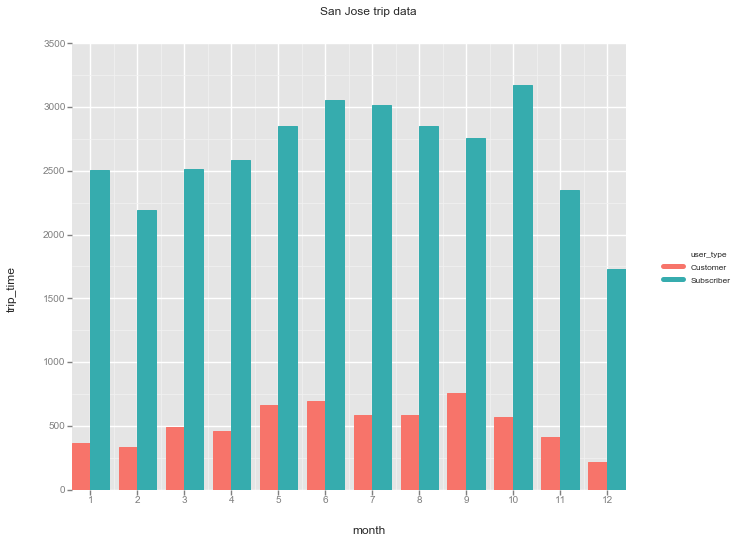

<ggplot: (383206492)>

In [127]:
ggplot(SJ_trip_weather, aes(x="month", y="trip_time", fill = "user_type"))+\
    geom_bar()+\
    labs(title = "San Jose trip data")

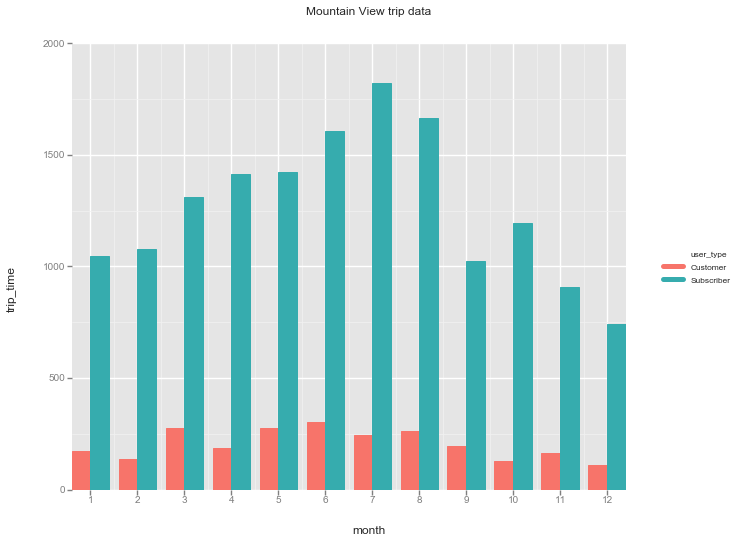

<ggplot: (-9223372036468854156)>

In [128]:
ggplot(MV_trip_weather, aes(x="month", y="trip_time", fill = "user_type"))+\
    geom_bar()+\
    labs(title = "Mountain View trip data")

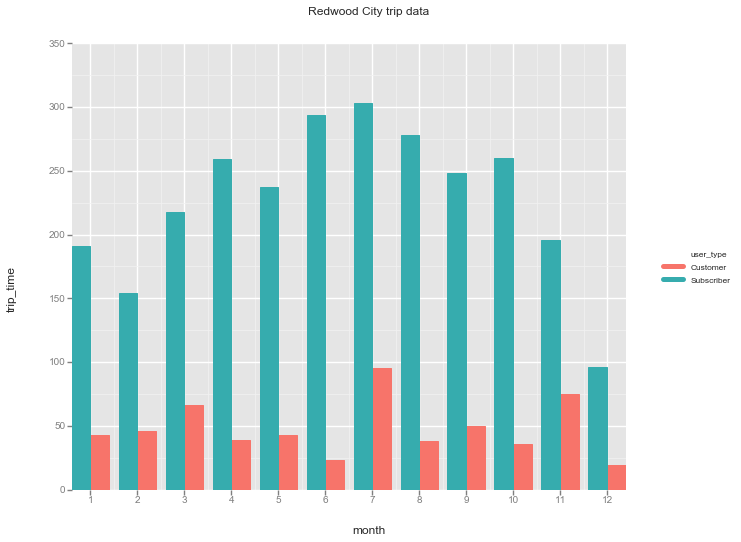

<ggplot: (-9223372036465092955)>

In [130]:
ggplot(RW_trip_weather, aes(x="month", y="trip_time", fill = "user_type"))+\
    geom_bar()+\
    labs(title = "Redwood City trip data")

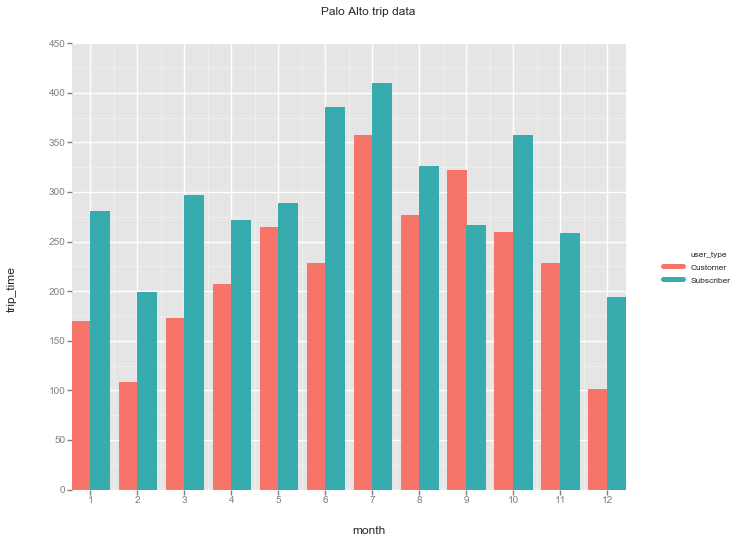

<ggplot: (387810915)>

In [129]:
ggplot(PA_trip_weather, aes(x="month", y="trip_time", fill = "user_type"))+\
    geom_bar()+\
    labs(title = "Palo Alto trip data")

In [89]:
SF_trip_weather.groupby("rain_inches").count()

,date,trip_id,trip_time,start_dt,start_station,start_id,end_dt,end_station,end_id,bike_num,...,max_vis,mean_vis,min_vis,max_wind,mean_wind,max_gust,cloud_cover,wind_dir_degrees,ZIP,season
rain_inches,,,,,,,,,,,,,,,,,,,,,
0.00,33306,33306,33306,33306,33306,33306,33306,33306,33306,33306,...,33306,33306,33306,33306,33306,28723,33306,33306,33306,33306
0.01,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,...,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835
0.08,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,...,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063
0.09,784,784,784,784,784,784,784,784,784,784,...,784,784,784,784,784,784,784,784,784,784
0.32,770,770,770,770,770,770,770,770,770,770,...,770,770,770,770,770,770,770,770,770,770
0.43,352,352,352,352,352,352,352,352,352,352,...,352,352,352,352,352,352,352,352,352,352
0.57,546,546,546,546,546,546,546,546,546,546,...,546,546,546,546,546,546,546,546,546,546


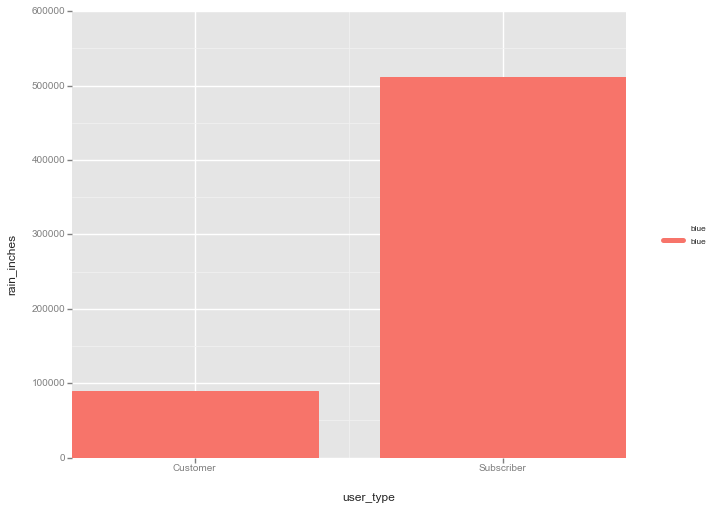

<ggplot: (-9223372036508651811)>

In [95]:
ggplot(SF_trip_weather, aes(x="user_type", y="rain_inches", fill="blue"))+\
    geom_bar()

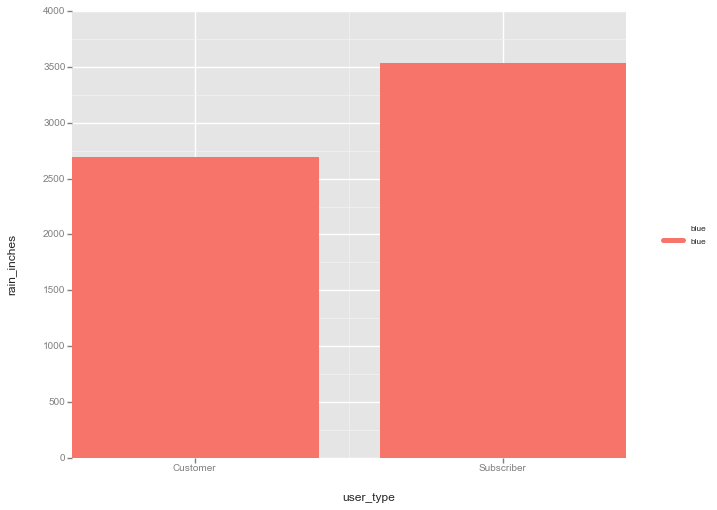

<ggplot: (334065079)>

In [103]:
ggplot(PA_trip_weather, aes(x="user_type", y="rain_inches", fill="blue"))+\
    geom_bar()

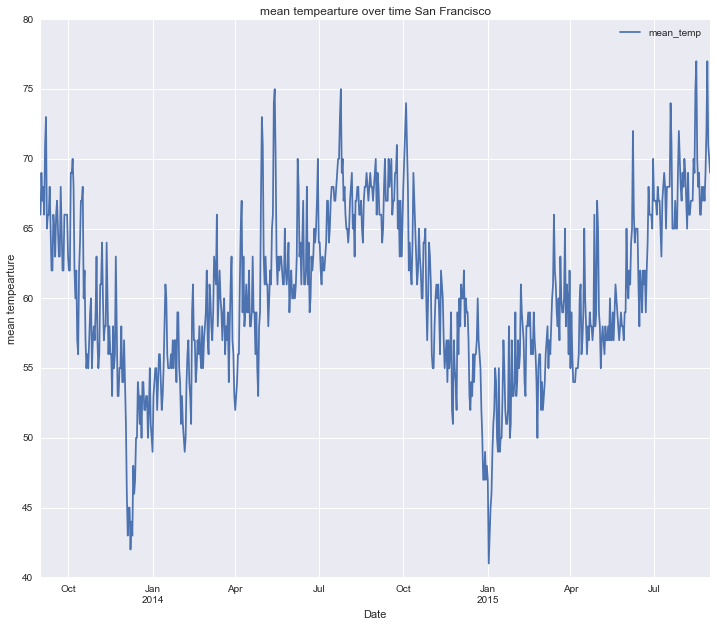

In [35]:
SF_weather.plot(x='date', y='mean_temp',figsize=((12,10)))
plt.title("mean tempearture over time San Francisco")
plt.xlabel("Date")
plt.ylabel("mean tempearture")

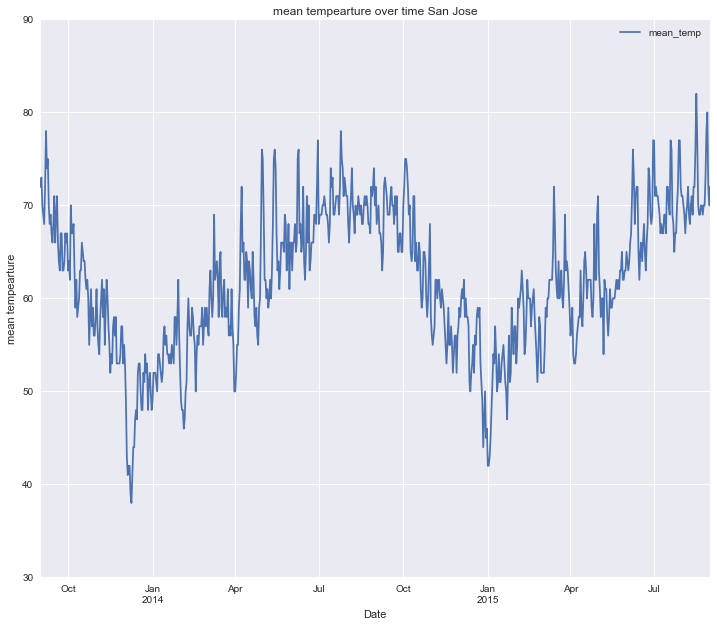

In [45]:
SJ_weather.plot(x='date', y='mean_temp',figsize=((12,10)))
plt.title("mean tempearture over time San Jose")
plt.xlabel("Date")
plt.ylabel("mean tempearture")

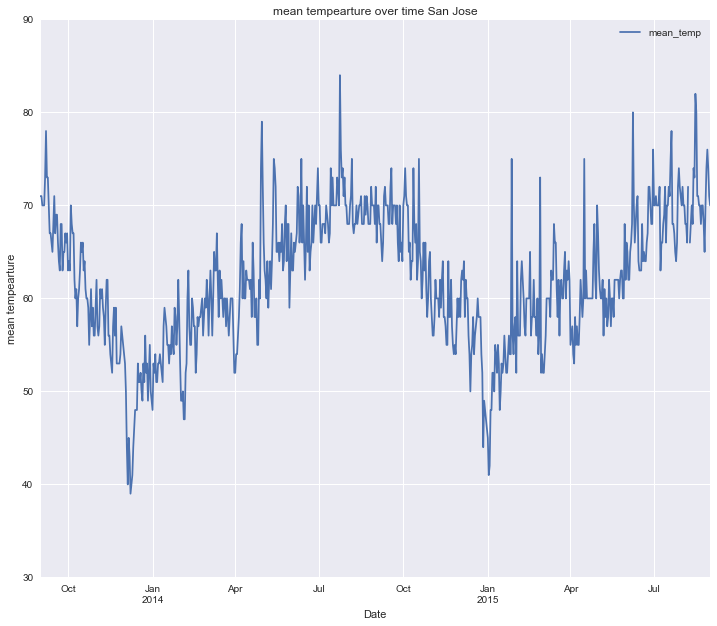

In [64]:
PA_weather.plot(x='date', y='mean_temp',figsize=((12,10)))
plt.title("mean tempearture over time San Jose")
plt.xlabel("Date")
plt.ylabel("mean tempearture")

## Combine Trip and Weather data together

In [107]:
tripsame = tripsame.drop(['end_city'], axis=1)
tripsame = tripsame.rename(columns={'start_city': 'city'})

In [115]:
trip_weather=trip_data.merge(weather_data)

In [113]:
trip_weather=trip_data.merge(weather_data, how = "left",on = ["date", "city", "day_of_week","number_of_week","month", "year"])

In [112]:
weather_data.head()

,date,max_temp,mean_temp,min_temp,max_dp,mean_dp,min_dp,max_hum,mean_hum,min_hum,...,rain_inches,cloud_cover,wind_dir_degrees,ZIP,season,city,day_of_week,number_of_week,month,year
0,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,0.0,4.0,284.0,94107,Autumn,San Francisco,Sunday,6,6,2013
1,2013-09-01,81.0,70.0,61.0,62.0,58.0,54.0,80.0,67.0,47.0,...,0.0,1.0,354.0,94041,Autumn,Mountain View,Sunday,6,6,2013
2,2013-09-01,80.0,71.0,62.0,62.0,58.0,55.0,84.0,65.0,45.0,...,0.0,1.0,354.0,94301,Autumn,Palo Alto,Sunday,6,6,2013
3,2013-09-01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,0.0,2.0,308.0,95113,Autumn,San Jose,Sunday,6,6,2013
4,2013-09-01,80.0,71.0,62.0,61.0,57.0,55.0,82.0,72.0,42.0,...,0.0,3.0,294.0,94063,Autumn,Redwood City,Sunday,6,6,2013


In [111]:
tripsame.head()

,date,trip_id,trip_time,start_dt,start_station,start_id,end_dt,end_station,end_id,bike_num,user_type,city,new,day_of_week,number_of_week,month,year
0,2013-09-01,7442,1508,2013-09-01 00:11:00,Mechanics Plaza (Market at Battery),75,9/1/2013 0:36,Beale at Market,56,506,Customer,San Francisco,2013-09-01,Sunday,6,9,2013
1,2013-09-01,8138,274,2013-09-01 15:46:00,San Francisco Caltrain (Townsend at 4th),70,9/1/2013 15:50,2nd at Townsend,61,363,Subscriber,San Francisco,2013-09-01,Sunday,6,9,2013
2,2013-09-01,8139,1197,2013-09-01 15:46:00,Civic Center BART (7th at Market),72,9/1/2013 16:06,Beale at Market,56,614,Customer,San Francisco,2013-09-01,Sunday,6,9,2013
3,2013-09-01,8140,1511,2013-09-01 15:47:00,Embarcadero at Bryant,54,9/1/2013 16:12,Embarcadero at Sansome,60,411,Customer,San Francisco,2013-09-01,Sunday,6,9,2013
4,2013-09-01,8141,1511,2013-09-01 15:47:00,Embarcadero at Bryant,54,9/1/2013 16:12,Embarcadero at Sansome,60,604,Customer,San Francisco,2013-09-01,Sunday,6,9,2013


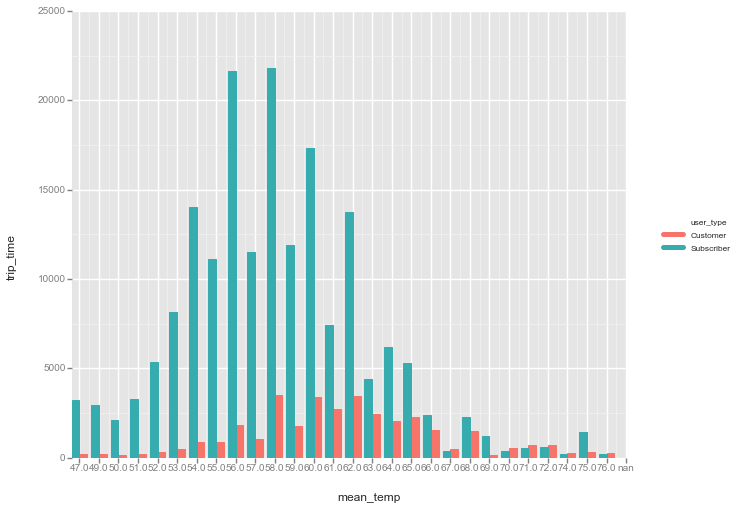

<ggplot: (-9223372036508405707)>

In [117]:
ggplot(trip_weather, aes(x="mean_temp", y="trip_time", fill = "user_type")) +\
    geom_bar()

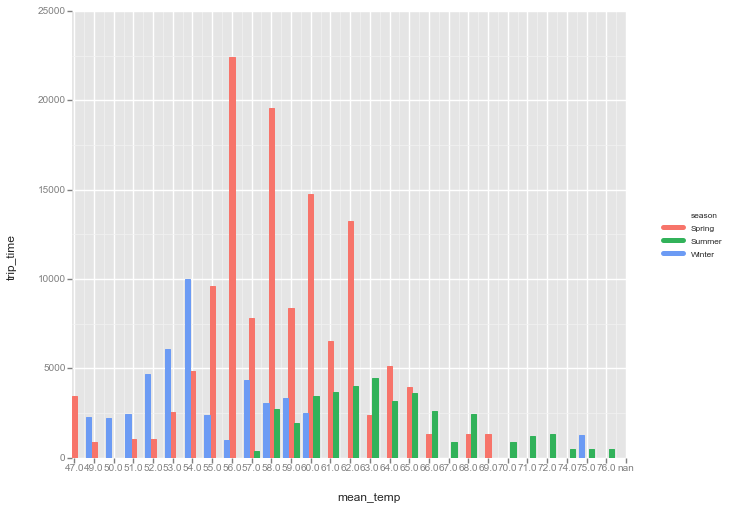

<ggplot: (383229430)>

In [122]:
ggplot(trip_weather, aes(x="mean_temp", y="trip_time", fill = "season")) +\
    geom_bar()